### Build a Simple Workflow or Graph Using LangGraph

#### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

#### Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [2]:
import time
def start_play(vaibhav:State):
    print("Start_Play node has been called")
    time.sleep(2) 
    return {"graph_info":vaibhav['graph_info'] + " I am planning to play"}

def cricket(state:State):
    print("My Cricket node has been called")
    time.sleep(2) 
    return {"graph_info":state['graph_info'] + " Cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    time.sleep(2) 
    return {"graph_info":state['graph_info'] + " Badminton"}

def basketball(state:State):
    print("My basketball node has been called")
    time.sleep(2) 
    return {"graph_info":state['graph_info'] + " Basketball"}

In [3]:
import random
random.random()

0.2058815974133934

In [4]:
import random
from typing import Literal

def random_play1(state:State)-> Literal['cricket','badminton', 'basketball']:
    # graph_info=state['graph_info']

    num = random.random()
    if num<0.33:
        return "cricket"
    elif num<0.66:
        return "basketball"
    else:
        return "badminton"

#### Graph Construction
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

In [11]:
# from IPython.display import Markdown, display
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

## Adding the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)
graph.add_node("basketball",basketball)

## Schedule the flow of the graph

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play1)
graph.add_edge("cricket",END)
graph.add_edge("basketball",END)
graph.add_edge("badminton",END)

## Compile the graph
graph_builder=graph.compile()

## View
# mermaid = graph_builder.get_graph().draw_mermaid()
# display(Markdown(f"```mermaid\n{mermaid}\n```"))
# display(Image(graph_builder.get_graph().draw_mermaid_png()))
# Show the agent
# from IPython.display import Image, display
# display(Image(graph_builder.get_graph(xray=True).draw_mermaid_png()))
png = graph_builder.get_graph(xray=True).draw_mermaid_png()
display(Image(png))

ValueError: Failed to reach https://mermaid.ink API while trying to render your graph. Status code: 400.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`

In [6]:
!uv add graphviz

Resolved 279 packages in 11ms
Audited 257 packages in 0.15ms


In [ ]:
# from graphviz import Source

# mermaid = graph_builder.get_graph().draw_mermaid()
# Source(mermaid)  # graphviz will render it


In [ ]:
from mermaid_render import MermaidRenderer
from IPython.display import Image

mermaid_code = """
---
config:
  flowchart:
    curve: linear
---
graph TD;
    __start__([<p>__start__</p>]):::first
    start_play(start_play)
    cricket(cricket)
    badminton(badminton)
    basketball(basketball)
    __end__([<p>__end__</p>]):::last
    __start__ --> start_play;
    start_play -.-> badminton;
    start_play -.-> basketball;
    start_play -.-> cricket;
    badminton --> __end__;
    basketball --> __end__;
    cricket --> __end__;
    classDef default fill:#f2f0ff,line-height:1.2
    classDef first fill-opacity:0
    classDef last fill:#bfb6fc
"""

renderer = MermaidRenderer()
renderer.to_png(mermaid_code, "graph.png")

Image("graph.png")


In [ ]:
!uv add mermaid-render

In [ ]:
from mermaid_render import MermaidRenderer
from IPython.display import Image

mermaid_code = graph_builder.get_graph().draw_mermaid()

renderer = MermaidRenderer()
renderer.to_png(mermaid_code, "graph.png")

Image("graph.png")

### GRAPH Invocation

In [55]:
graph_builder.invoke({"graph_info":"Hey My name is VaibhaV"})

Start_Play node has been called
My badminton node has been called


{'graph_info': 'Hey My name is VaibhaV I am planning to play Badminton'}

In [56]:
for event in graph_builder.invoke({"graph_info":"Hey My name is VaibhaV"}):
    print(event)

Start_Play node has been called
My Cricket node has been called
graph_info


In [57]:
for event in graph_builder.stream({"graph_info":"Hey My name is VaibhaV"}):
    print(event)

Start_Play node has been called
{'start_play': {'graph_info': 'Hey My name is VaibhaV I am planning to play'}}
My basketball node has been called
{'basketball': {'graph_info': 'Hey My name is VaibhaV I am planning to play Basketball'}}


In [58]:
for event in graph_builder.stream({"graph_info":"Hey My name is VaibhaV"}, stream_mode="values"):
    print(event)

{'graph_info': 'Hey My name is VaibhaV'}
Start_Play node has been called
{'graph_info': 'Hey My name is VaibhaV I am planning to play'}
My Cricket node has been called
{'graph_info': 'Hey My name is VaibhaV I am planning to play Cricket'}


In [59]:
for event in graph_builder.stream({"graph_info":"Hey My name is VaibhaV"}, stream_mode="updates"):
    print(event)

Start_Play node has been called
{'start_play': {'graph_info': 'Hey My name is VaibhaV I am planning to play'}}
My Cricket node has been called
{'cricket': {'graph_info': 'Hey My name is VaibhaV I am planning to play Cricket'}}


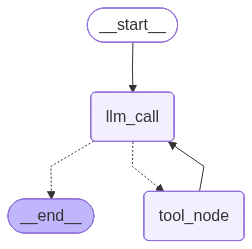

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (fc_9bb3adc4-84fb-48a2-99fa-abf8a6e974d3)
 Call ID: fc_9bb3adc4-84fb-48a2-99fa-abf8a6e974d3
  Args:
    a: 3
    b: 4
================================= Tool Message =================================

7
================================== Ai Message ==================================

The sum of 3 and 4 is **7**.


In [8]:
# Step 1: Define tools and model

from langchain.tools import tool
from langchain.chat_models import init_chat_model
from langchain_groq import ChatGroq


# model = init_chat_model(
#     "openai/gpt-oss-120b",
#     temperature=0
# )
model=ChatGroq(model="openai/gpt-oss-120b", temperature=0)


# Define tools
@tool
def multiply(a: int, b: int) -> int:
    """Multiply `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a * b


@tool
def add(a: int, b: int) -> int:
    """Adds `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a + b


@tool
def divide(a: int, b: int) -> float:
    """Divide `a` and `b`.

    Args:
        a: First int
        b: Second int
    """
    return a / b


# Augment the LLM with tools
tools = [add, multiply, divide]
tools_by_name = {tool.name: tool for tool in tools}
model_with_tools = model.bind_tools(tools)

# Step 2: Define state

from langchain.messages import AnyMessage
from typing_extensions import TypedDict, Annotated
import operator


class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
    llm_calls: int

# Step 3: Define model node
from langchain.messages import SystemMessage


def llm_call(state: dict):
    """LLM decides whether to call a tool or not"""

    return {
        "messages": [
            model_with_tools.invoke(
                [
                    SystemMessage(
                        content="You are a helpful assistant tasked with performing arithmetic on a set of inputs."
                    )
                ]
                + state["messages"]
            )
        ],
        "llm_calls": state.get('llm_calls', 0) + 1
    }


# Step 4: Define tool node

from langchain.messages import ToolMessage


def tool_node(state: dict):
    """Performs the tool call"""

    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}

# Step 5: Define logic to determine whether to end

from typing import Literal
from langgraph.graph import StateGraph, START, END


# Conditional edge function to route to the tool node or end based upon whether the LLM made a tool call
def should_continue(state: MessagesState) -> Literal["tool_node", END]:
    """Decide if we should continue the loop or stop based upon whether the LLM made a tool call"""

    messages = state["messages"]
    last_message = messages[-1]

    # If the LLM makes a tool call, then perform an action
    if last_message.tool_calls:
        return "tool_node"

    # Otherwise, we stop (reply to the user)
    return END

# Step 6: Build agent

# Build workflow
agent_builder = StateGraph(MessagesState)

# Add nodes
agent_builder.add_node("llm_call", llm_call)
agent_builder.add_node("tool_node", tool_node)

# Add edges to connect nodes
agent_builder.add_edge(START, "llm_call")
agent_builder.add_conditional_edges(
    "llm_call",
    should_continue,
    ["tool_node", END]
)
agent_builder.add_edge("tool_node", "llm_call")

# Compile the agent
agent = agent_builder.compile()


from IPython.display import Image, display
# Show the agent
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

# Invoke
from langchain.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4.")]
messages = agent.invoke({"messages": messages})
for m in messages["messages"]:
    m.pretty_print()